# Health Data

In [1]:
import pandas as pd
import numpy as np
import missingno as missno 
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/Users/helenwind/Desktop/Coding/SUTD/Health Care/observations.csv",header=0)

## Summary

In [3]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369664 entries, 0 to 3369663
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   DATE         object
 1   PATIENT      object
 2   ENCOUNTER    object
 3   CATEGORY     object
 4   CODE         object
 5   DESCRIPTION  object
 6   VALUE        object
 7   UNITS        object
 8   TYPE         object
dtypes: object(9)
memory usage: 231.4+ MB
None


In [4]:
print(df.shape)

(3369664, 9)


In [5]:
print(df.index)

RangeIndex(start=0, stop=3369664, step=1)


In [6]:
print(df.describe())

                        DATE                               PATIENT  \
count                3369664                               3369664   
unique                364022                                  6038   
top     1970-08-01T20:44:20Z  62247538-33bf-e5a0-0d86-34159a0126ef   
freq                     116                                 11185   

                                   ENCOUNTER    CATEGORY     CODE  \
count                                3209032     3209032  3369664   
unique                                122203           8      250   
top     9f01dbb9-de28-2596-204a-adc4dc5600cf  laboratory   8462-4   
freq                                     766     1296248    89011   

                     DESCRIPTION    VALUE    UNITS     TYPE  
count                    3369664  3369664  2331074  3369664  
unique                       263    17034       43        2  
top     Diastolic Blood Pressure       No    mg/dL  numeric  
freq                       89011   346244   335395  224

## Missing Values

Total number of missing values in the DataFrame

In [7]:
print(df.isnull().sum().sum())

1359854


Total number of missing values by column

In [8]:
print(df.isnull().sum(axis=0))

DATE                 0
PATIENT              0
ENCOUNTER       160632
CATEGORY        160632
CODE                 0
DESCRIPTION          0
VALUE                0
UNITS          1038590
TYPE                 0
dtype: int64


Total rows with no missing entries in all their columns

In [9]:
complete_rows = df.isnull().sum(axis=1) == 0
num_complete_rows = len(df[complete_rows])
print(num_complete_rows)

2170442


### Missingno

/Users/helenwind/anaconda3/lib/python3.10/site-packages/missingno/missingno.py:271: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<AxesSubplot:>

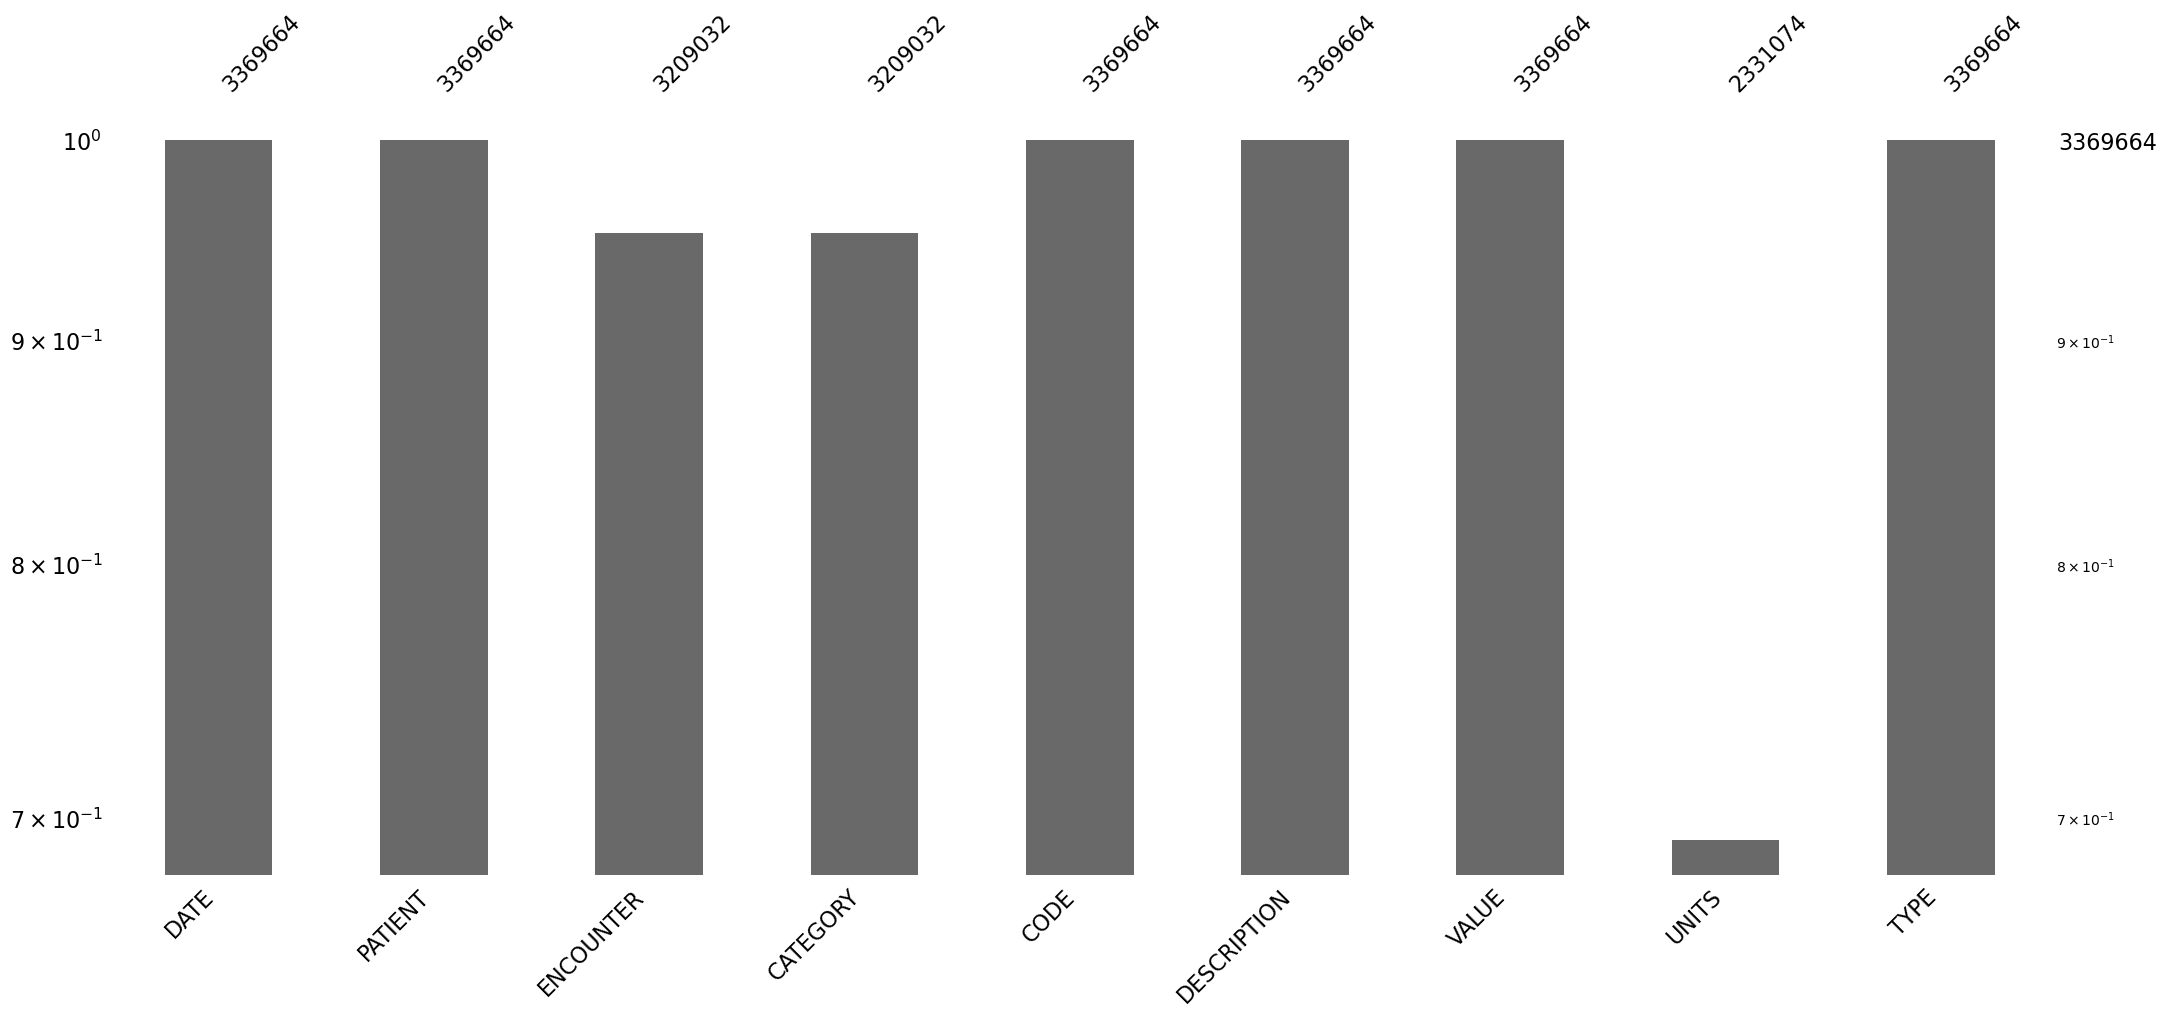

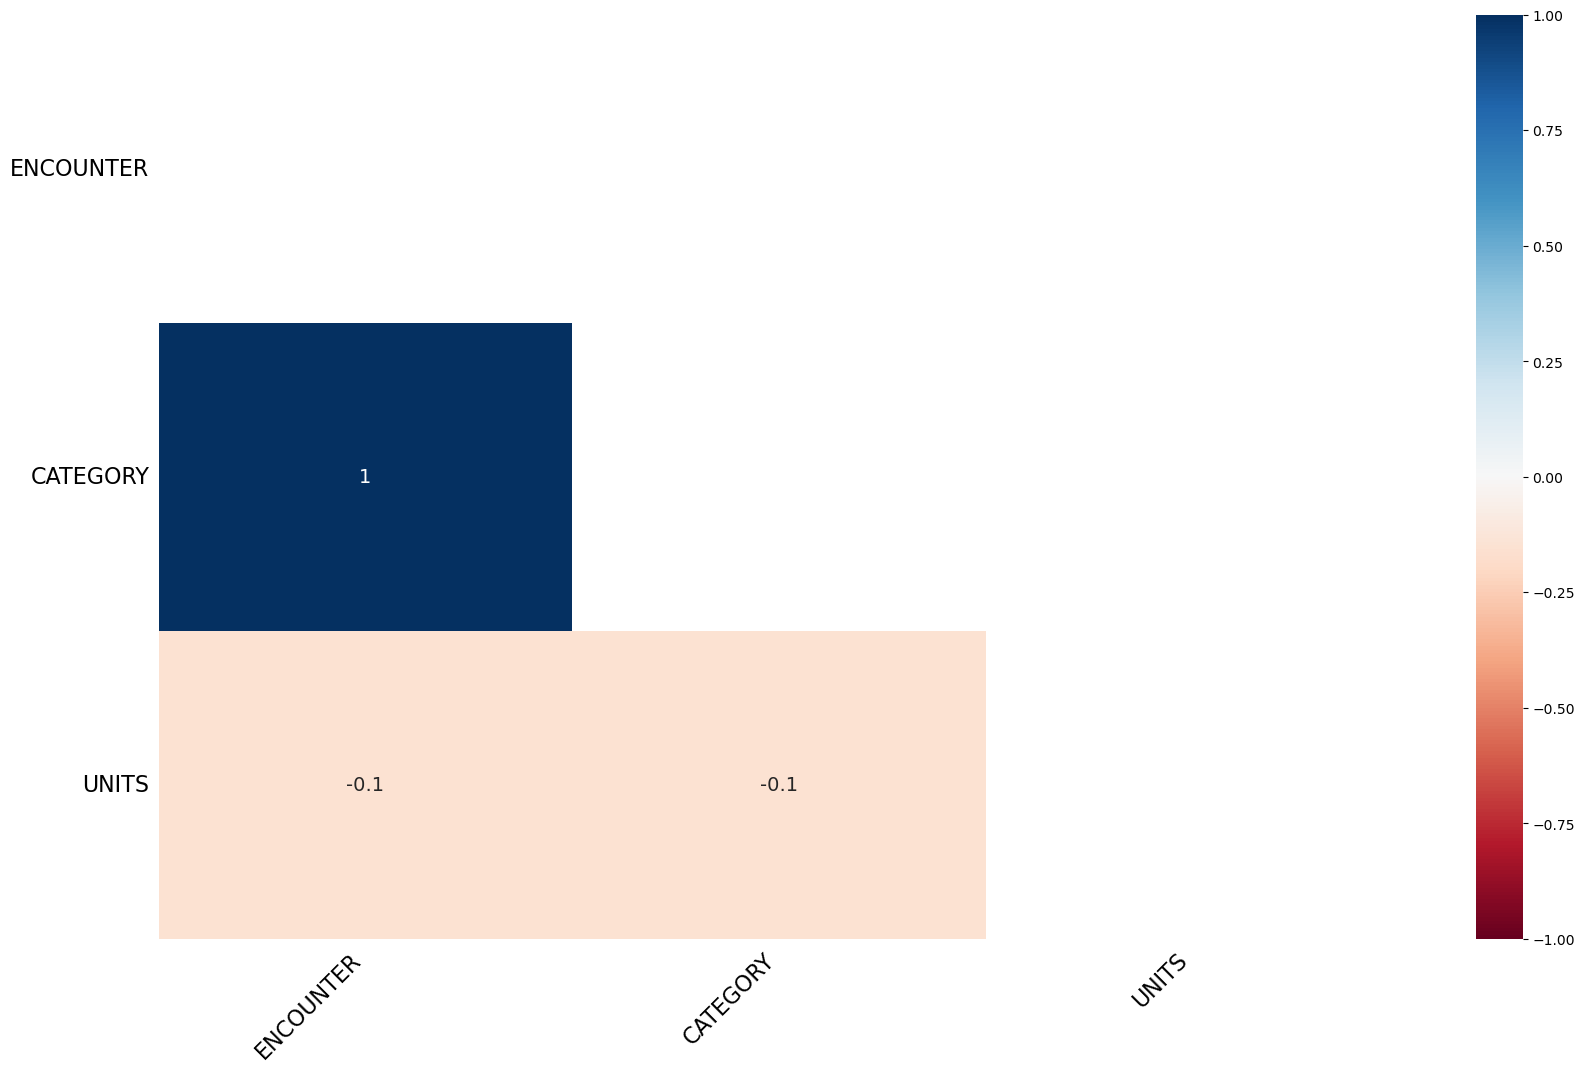

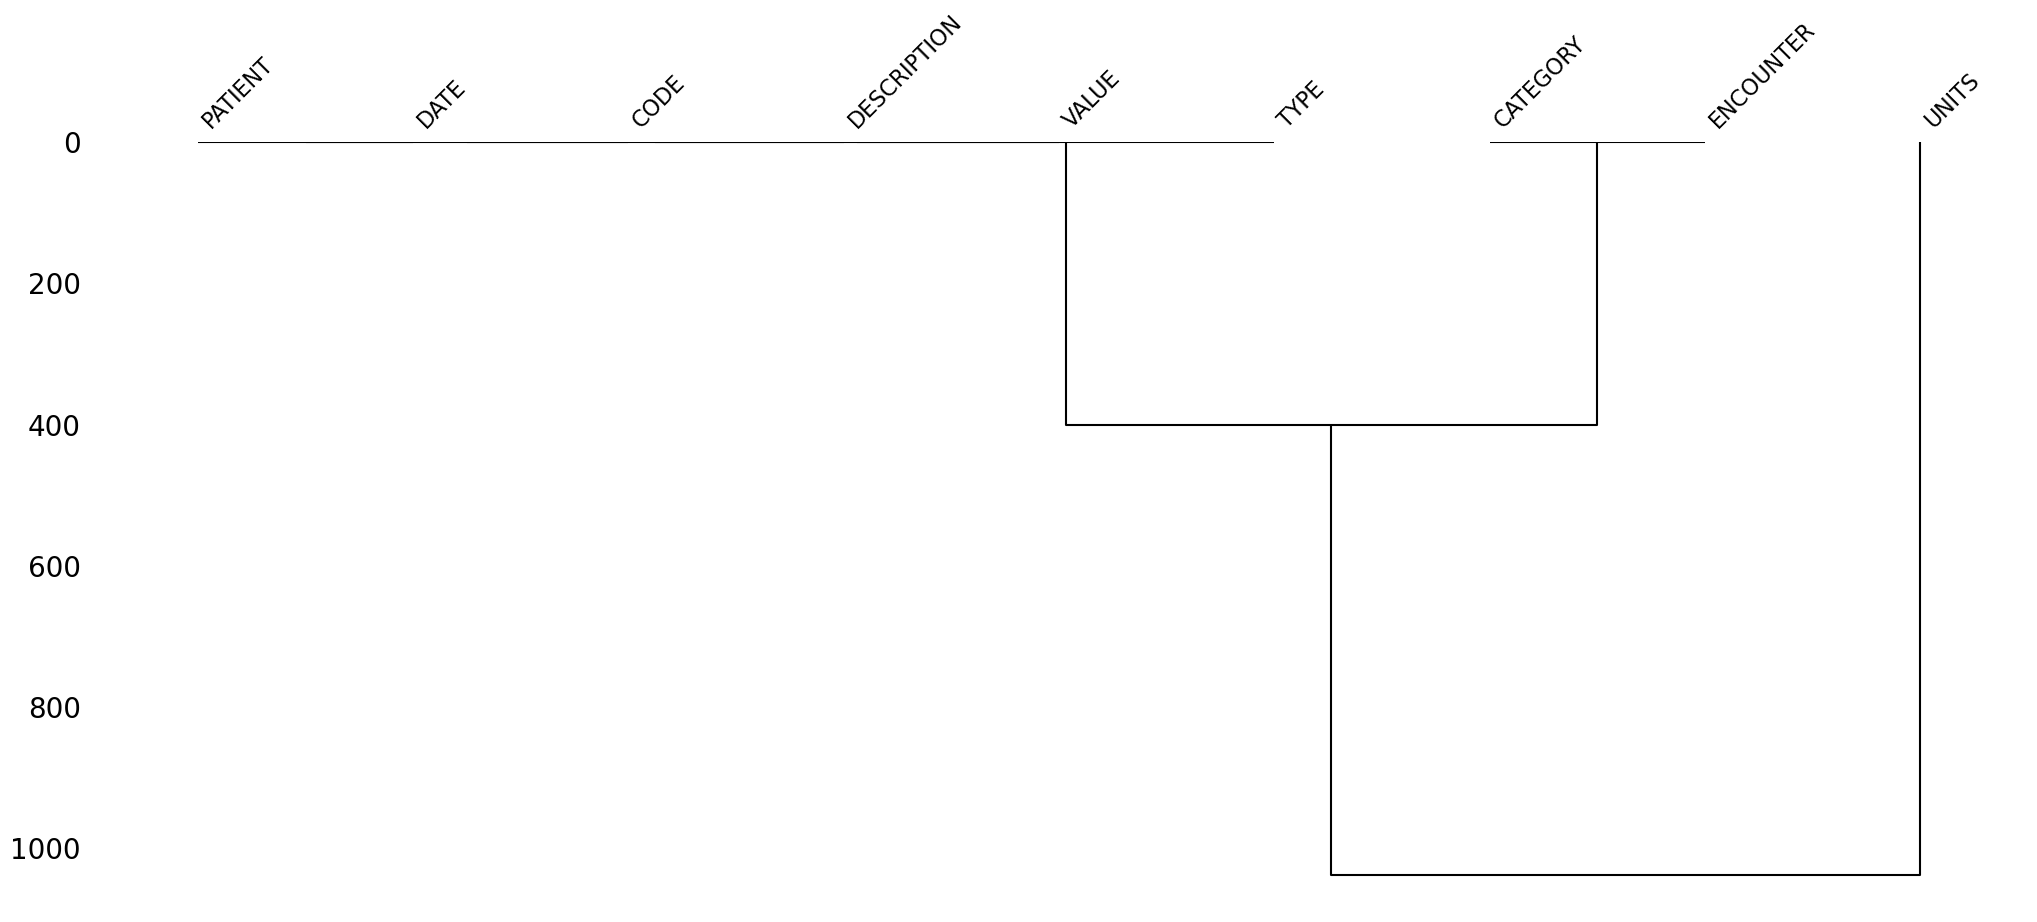

In [10]:
missno.bar(df, log=True) 

missno.heatmap(df) 

missno.dendrogram(df)

## Columns

Name of columns:

In [11]:
print(df.columns.tolist()) 

['DATE', 'PATIENT', 'ENCOUNTER', 'CATEGORY', 'CODE', 'DESCRIPTION', 'VALUE', 'UNITS', 'TYPE']


Rename columns:

In [12]:
df = df.rename(columns={'ENCOUNTER': 'occurance', 'PATIENT': 'patient_id'})

## Duplication

Rows:

In [13]:
duplicated_rows = df.duplicated()

print(df[duplicated_rows])  

                         DATE                            patient_id  \
68530    2021-04-28T08:16:53Z  94ddfa2e-f98a-6688-ca15-c3cc788953e2   
68531    2021-04-28T08:16:53Z  94ddfa2e-f98a-6688-ca15-c3cc788953e2   
68533    2021-04-28T08:16:53Z  94ddfa2e-f98a-6688-ca15-c3cc788953e2   
68534    2021-04-28T08:16:53Z  94ddfa2e-f98a-6688-ca15-c3cc788953e2   
68535    2021-04-28T08:16:53Z  94ddfa2e-f98a-6688-ca15-c3cc788953e2   
...                       ...                                   ...   
3359786  1995-08-25T10:08:41Z  c87aff81-e872-5c46-071e-6904679db66c   
3359787  1995-08-25T10:08:41Z  c87aff81-e872-5c46-071e-6904679db66c   
3359788  1995-08-25T10:08:41Z  c87aff81-e872-5c46-071e-6904679db66c   
3359789  1995-08-25T10:08:41Z  c87aff81-e872-5c46-071e-6904679db66c   
3359790  1995-08-25T10:08:41Z  c87aff81-e872-5c46-071e-6904679db66c   

                                    occurance    CATEGORY     CODE  \
68530    ee2414b6-59df-4834-a30f-ad7195292a93  laboratory   2339-0   
68531  

Columns:

In [ ]:
duplicated_columns = df.T.duplicated()

In [ ]:
print(df.loc[:, duplicated_columns])

## Removing Duplicate Rows

In [14]:
print(df.shape)

(3369664, 9)


In [15]:
df.drop_duplicates(inplace=False)

,DATE,patient_id,occurance,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2011-09-28T09:34:36Z,231a2cb1-0ebe-dc12-3c96-f625d795ef3a,73a11da3-df04-f61a-0834-5d597a473f10,vital-signs,8302-2,Body Height,169.5,cm,numeric
1,2011-09-28T09:34:36Z,231a2cb1-0ebe-dc12-3c96-f625d795ef3a,73a11da3-df04-f61a-0834-5d597a473f10,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,0.0,{score},numeric
2,2011-09-28T09:34:36Z,231a2cb1-0ebe-dc12-3c96-f625d795ef3a,73a11da3-df04-f61a-0834-5d597a473f10,vital-signs,29463-7,Body Weight,83.7,kg,numeric
3,2011-09-28T09:34:36Z,231a2cb1-0ebe-dc12-3c96-f625d795ef3a,73a11da3-df04-f61a-0834-5d597a473f10,vital-signs,39156-5,Body Mass Index,29.1,kg/m2,numeric
4,2011-09-28T09:34:36Z,231a2cb1-0ebe-dc12-3c96-f625d795ef3a,73a11da3-df04-f61a-0834-5d597a473f10,vital-signs,59576-9,Body mass index (BMI) [Percentile] Per age and...,93.9,%,numeric
...,...,...,...,...,...,...,...,...,...
3369659,2017-07-31T00:50:46Z,ea8d1364-2fe4-f4cc-7979-e959537f5117,NaN,NaN,QOLS,QOLS,0.8,{score},numeric
3369660,2018-07-31T00:50:46Z,ea8d1364-2fe4-f4cc-7979-e959537f5117,NaN,NaN,QOLS,QOLS,0.7,{score},numeric
3369661,2019-07-31T00:50:46Z,ea8d1364-2fe4-f4cc-7979-e959537f5117,NaN,NaN,QOLS,QOLS,0.8,{score},numeric
3369662,2020-07-31T00:50:46Z,ea8d1364-2fe4-f4cc-7979-e959537f5117,NaN,NaN,QOLS,QOLS,0.8,{score},numeric


In [16]:
print(df.shape)

(3369664, 9)


shape shows how many rows removed

## Editing Data Values

Standardize 'Type' column:

In [17]:
df['TYPE'] = df['TYPE'].replace({'numeric': 'num', 'text': 'txt'})

Convert column datatype:

In [18]:
df['patient_id'] = df['patient_id'].astype("string")


Split column:

In [19]:
df[['date', 'time']] = df['DATE'].str.split('T', expand=True)

Filling blank values with 'NA':

In [20]:
df['UNITS']=df['UNITS'].fillna(value = 'NA', inplace=False)

Filling blank values with forward fill:

In [21]:
df['CATEGORY'] = df['CATEGORY'].fillna(method='ffill',inplace=False)


Change data type:

In [22]:
df['date'] = pd.to_datetime(df['date'])

## Remove Columns

In [23]:
df_drop = df.drop('TYPE', axis=1, inplace=True)

## Visualisation

Removing rows where Value is not number or is zero:

In [24]:
filtered_df = df[df['VALUE'] != 0]

In [ ]:
filtered_df = df[df['VALUE'] != 0].copy()
filtered_df.loc[:, 'VALUE'] = pd.to_numeric(filtered_df['VALUE'])

Skew and Kurt:

In [ ]:
value_skew = numeric_values[~np.isnan(numeric_values)].skew()
value_kurt = numeric_values[~np.isnan(numeric_values)].kurt()

In [ ]:
print("Skew" + " " + str(value_skew))
print("Kurt" + " " + str(value_kurt))

Log:

In [ ]:
filtered_df['log10_value'] = np.log10(filtered_df['VALUE']) # apply a Log10 transformation to normalize

log10_skew = filtered_df['log10_value'].skew()
log10_kurt = filtered_df['log10_value'].kurt()

In [ ]:
print("Skew: log10" + str(log10_skew))
print("Kurt: log10" + str(log10_kurt))

Histogram:

Original data:

In [ ]:
plt.hist(filtered_df['VALUE'])
plt.xlabel('Value')
plt.ylabel('Frequency')

log10:

In [ ]:
plt.hist(filtered_df['log10_value'])         
plt.xlabel('Value')             
plt.ylabel('Frequency')            
plt.title(f'Histogram of log10(value), skewness= log10_skew')
plt.show()  

## Aggregation:

In [ ]:
print(df.groupby('patient_id')['VALUE'].agg(['sum', 'mean']))

In [ ]:
print(df.groupby('patient_id').agg({'VALUE': ['max', 'min']}))

In [ ]:
df.groupby('CATEGORY')['VALUE'].describe()